## beautifulsoup & newspaper3k drawling

In [4]:
from bs4 import BeautifulSoup
from newspaper import Article

#- 파싱할 뉴스 기사 주소입니다.
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002881076'

#- 언어가 한국어이므로 language='ko'로 설정해줍니다.
article = Article(url, language='ko')
article.download()
article.parse()

In [5]:
#- 기사 제목을 출력합니다.
print('기사 제목 :')
print(article.title)
print('')

#- 기사 내용을 출력합니다.
print('기사 내용 :')
print(article.text)

기사 제목 :
[AI 사피엔스 시대]자연어처리 기술, 컴퓨팅 파워 경쟁 시대로

기사 내용 :
[Copyright ⓒ 전자신문 & 전자신문인터넷, 무단전재 및 재배포 금지]

주로 아이디어와 기술력으로 경쟁했던 자연어처리 인공지능(AI) 분야는 점차 컴퓨팅 파워 싸움으로 무게 추가 이동하고 있다. 모델이 대형화되면서 향상된 퍼포먼스 확보에 필요한 자금 규모도 커지고 있다. 자칫 대기업 자본력에 휘둘릴 수 있다는 우려도 함께 나온다.자연어처리(NLP)는 인간이 사용하는 언어 체계를 기계가 인식하도록 알고리즘을 디자인하는 기술이다. 흔히 말하는 컴퓨터 혹은 인간과 대화하는 컴퓨터 관련 기술이 포함된다.목적에 따라 세 가지 카테고리로 나뉜다. 인간이 제기한 질문에 자동으로 적절한 답을 찾아주는 '질의응답(QA)', 원하는 업무를 지시했을 때 작업을 수행하는 '테스크 컴플리션', 그리고 특별한 목적이 없는 대화를 의미하는 '오픈도메인 컨버세이션(비목적성 대화)'이 있다. 각기 발전해왔던 세 가지 기술은 지난 2018년 구글의 인공지능 언어모델 '버트(BERT)'의 등장으로 패러다임이 전환됐다. 압도적인 성능으로 대량의 프리트레이닝(사전학습)이 가능해지면서 굳이 셋을 구분할 필요가 없어진 것이다.기계학습 연구에서 모델을 학습할 때는 지도학습과 비지도학습, 강화학습 중 하나를 골라 활용한다. 지도학습은 사람이 적절한 입력과 출력을 부여하는 방식이다. 정답이 정해져 있고 기계의 정답률도 쉽게 측정할 수 있다. 반면에 비지도학습은 정답이 정해지지 않은 데이터에 대해서도 기계가 스스로 클러스터링 등을 통해 학습한다. 체계화되지 않은 대량의 데이터를 학습 가능하지만 학습이 맞게 됐는지 확인하기 어렵다.버트는 기존 AI 학습 방법을 혁신적으로 바꿔놨다는 평가를 받는다. 자연어처리를 교사 없이 양방향으로 사전 학습하는 최초의 시스템이다. 비지도학습 방식을 사용하면서도 기존 존재했던 어떤 기술보다 뛰어난 성능을 보여준다. 최근 1년 반 동안 버트를 필두로 AI 모델은 급격히 대형화되

In [6]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
  urllist= []
  for i in range(1, page_num + 1):
    url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)   
    news = requests.get(url)

    # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
    soup = BeautifulSoup(news.content, 'html.parser')

    # CASE 1
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    # CASE 2
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

In [7]:
#. 한 페이지당 뉴스 기사가 20개임을 감안하여 총 40개의 url리스트 받아오기
url_list = make_urllist(2, 101, 20200506)
print('뉴스 기사의 개수: ',len(url_list))

url_list1 = make_urllist(2, 101, 20200804)
print('뉴스 기사의 개수: ',len(url_list))

뉴스 기사의 개수:  40
뉴스 기사의 개수:  40


In [8]:
#. 5개만 출력해 보기
url_list[:5]

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451723',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451721',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451718',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0009849190',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451717']

In [9]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [10]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)

  #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
  df = pd.DataFrame({'news': text_list})

  #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
  df['code'] = idx2word[str(code)]
  return df

경제 카테고리(코드 101)의 40개의 URL 리스트로부터 데이터프레임을 생성

In [12]:
data = make_data(url_list, 101)
#- 상위 10개만 출력해봅니다.
data[:10]

,news,code
0,고려은단이 5월을 맞아 응원 메시지를 공유하는 ‘5월 5글자로 응원 부탁해!’ 이벤...,경제
1,코리아나화장품의 민감성 피부를 위한 저자극 스킨케어 브랜드 '프리엔제'가 마르고 건...,경제
2,서울장수주식회사가 부드럽고 달콤한 맛으로 인기를 모으고 있는 생막걸리 ‘인생막걸리’...,경제
3,[서울=뉴시스] 오동현 기자 = 모바일 게임 기업 컴투스는 3D 모바일 야구 게임 ...,경제
4,대원제약이 2020년 상반기 신입과 경력 정기 공채를 실시합니다.정기 공채 모집분야...,경제
5,"[AFP=연합뉴스] [AFP=연합뉴스]\n\n""요즘은 잔인한 날""…리프트도 앞서 9...",경제
6,이재용 삼성전자 부회장이 6일 삼성전자 서울 서초사옥에서 대국민 사과 회견을 하기 ...,경제
7,JW중외제약이 A형 혈우병 예방요법제 ‘헴리브라피하주사를 출시하고 본격적인 마케팅 ...,경제
8,"옵티팜과 휴벳바이오가 공동 개발중인 백신 후보 물질에 대해 마우스, 기니피그, 미니...",경제
9,[한국경제TV 신동호 기자]\n\n전남 나주시와 충북 청주시가 방사광 가속기 구축사...,경제


## 3-8. 네이버 뉴스 기사 크롤링 (3) 데이터 수집 및 전처리
여러 카테고리에 뉴스들도 수집해보기 -> 특저 날짜의 사회, 생활/문화, IT/과학

In [13]:
# 수집을 원하는 카테고리 코드를을 저장한 리스트를 만들어두기
code_list = [102, 103, 105]

code_list

[102, 103, 105]

In [14]:
def make_total_data(page_num, code_list, date):
  df = None

  for code in code_list:
    url_list = make_urllist(page_num, code, date)
    df_temp = make_data(url_list, code)
    print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

    if df is not None:
      df = pd.concat([df, df_temp])
    else:
      df = df_temp

  return df

In [15]:
df = make_total_data(1, code_list, 20200506)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [ ]:
print('뉴스 기사의 개수: ',len(df))

In [16]:
# n v a <- exclude all. or extract n
# 60개중 임의의 10개 샘플 선택하여 출력
df.sample(10)

,news,code
10,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,생활/문화
10,안병용 의정부시장 이천화재 희생자 합동분향소 헌화. 사진제공=의정부시 안병용 의정부...,사회
5,나주 방사광 가속기 조감도. 전남도 제공 나주 방사광 가속기 조감도. 전남도 제공\...,IT/과학
9,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,생활/문화
8,[서울=뉴시스] 박주연 기자 = BMW 공식 딜러 바바리안모터스가 프로야구단 SK와...,생활/문화
0,[서울=뉴시스] 오동현 기자 = 모바일 게임 기업 컴투스는 3D 모바일 야구 게임 ...,IT/과학
15,/뉴스1 DB. /뉴스1 DB.\n\n(서울=뉴스1) 이상학 기자 = 밤에 귀가하던...,사회
5,사진=에듀윌 사진=에듀윌\n\n계리직공무원은 우체국 내에서 현장 창구 업무를 비롯해...,생활/문화
13,블랙홀을 품은 삼중성계 HR 6819 상상도 [ESO/L. Calcada 제공/ 재...,IT/과학
7,동영상 뉴스\n\n5월 날씨가 맞나 싶으시죠.오늘도 초여름이었습니다.심지어 올 들어...,생활/문화


## 대량크롤링


In [ ]:
# 아래 주석처리된 코드의 주석을 해제하고 실행을 하면 대량 크롤링이 진행됩니다. 
# 위에서 수행했던 크롤링의 100배 분량이 수행될 것입니다. 한꺼번에 너무 많은 크롤링 요청이 서버에 전달되지 않도록 주의해 주세요. 
# 기사 일자를 바꿔보면서 데이터를 모으면 더욱 다양한 데이터를 얻을 수 있게 됩니다. 

#df = make_total_data(100, code_list, 20200506)

## 아래 블럭만 실행하지 말기!!! 누적되서 망함

In [ ]:
# 크롤링한 뉴스 기사의 양이 많으므로 실수로 유실하지 않도록 csv 파일로 별도 저장

import os

# 데이터프레임 파일을 csv 파일로 저장합니다.
# 저장경로는 이번 프로젝트를 위해 만든 폴더로 지정해 주세요.
###### csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
###### df.to_csv(csv_path, index=False)

###### if os.path.exists(csv_path):
######  print('{} File Saved!'.format(csv_path))

### 3-9. naver news article crawling (4) data preprocessing\
데이터를 가공/정제하여 모델의 훈련에 사용하기 좋은 숫자의 형태로 바꿔준다

In [19]:
#. 저장해둔 csv파일을 다시 읽어서 dataframe으로 저장하기 위한 코드
import os
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [20]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

0       파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1       동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2       황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3       귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4       서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                              ...                        
5119    신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...
5120    는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...
5121    머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...
5122    가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...
5123    이미지제공게티이미지뱅크 이미지제공게티이미지뱅크  전자신문  전자신문인터넷 무단전재 ...
Name: news, Length: 5124, dtype: object

In [21]:
# data에 null값이 있진 않은지 확인
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [22]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  3994


데이터 탐색
---
각 카테고리별 샘플 분포 확인 -> matplotlib에 한글폰트 적용안될 수 있음 주의
[matplotlib 한글폰트 설정방법](https://followers.tistory.com/26)

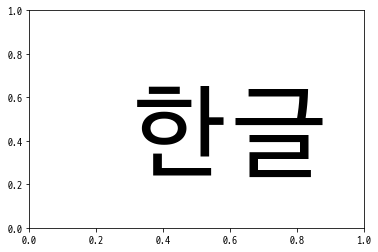

In [41]:
#. 한글 출력
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location='/home/aiffel/.local/share/fonts/D2CodingBold-Ver1.3.2-20180524-ligature.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
plt.rc('font',family=font_name)
plt.text(0.3, 0.3, '한글', size=100)

In [26]:
font_location='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

<AxesSubplot:>

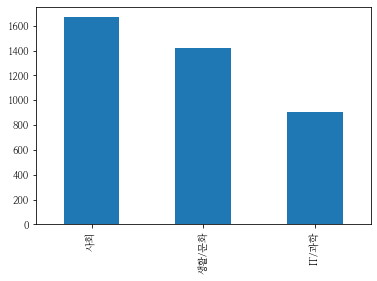

In [27]:
df['code'].value_counts().plot(kind = 'bar')

In [28]:
# 실 개수 확인
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학    903
1     사회   1668
2  생활/문화   1423


### 토큰화
자연어 처리 - 문자열은 특정 단위로 나누어지는데 이 특정 단위가 바로 토큰이다
토크나이징 - 문자열을 토큰으로 break down into pieces
[영어와 한국어의 토큰화의 차이](https://wikidocs.net/21698)   
-> 한국어 자연어처리의 경우에는 토큰화 과정을 주로 형태소 분석기를 사용해서 수행    
한국어의 경우 교착어라는 특성으로 인해 조사, 어미 등이 붙어있어 띄어쓰기 단위로
토큰화를 할 경우에는 같은 단어임에도 다른 단어로 인식될 수 있다.

In [42]:
# 형태소 패키지 라이브러리 Mecab
# Mecab의 .morphs를 사용하면 입력 문자열을 형태소 단위로 나눠줌
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '한', '대', '남성', '이', '구속', '됐', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '해', '수사', '하', '고', '있', '다고', '일', '밝혔', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '폭행', '을', '시도', '하', '려다가', '도망간', '혐의', '를', '받', '는다', '피해', '여성', '이', '저항', '하', '자', '놀란', '씨', '는', '도망갔으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '됐', '다', '피해', '여성', '은', '이', '과정', '에서', '경미', '한', '부상', '을', '입', '은', '것', '으로', '전해졌', '다']


자연어 처리: 토큰화 결과가 얼마나 정확한지에 다라 그 성능에 많은 영향을 받는다    
형태소 분석기의 결과가 머신러닝 결과의 성능에 큰 영향을 주기도 한다

### 불용어 제거(stopwords)
토큰화 전처리 필수과정 - 불필요한 토큰들을 제거하는 불용어 제거     


In [43]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

불용어 - 미리 짐작하여 한 번에 정의한는 것이 아니라 토큰화 과정을 거친 결과를 지속적으로 확인하면서 계속 추가하게 되는게 일반적이다

In [44]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [45]:
# 전체 데이터에 대해서 토큰화 및 불용어 제거를 수행한 뒤 첫 번째 샘플을 출력
text_data = preprocessing(df['news'])
print(text_data[0])

파주 시청 사진제 공파 주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포


### ML모델 적용을 위해 필요한 도구들 가져오기

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [48]:
# idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [49]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

print(df.groupby('code').size().reset_index(name = 'count'))

훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
    code  count
0  IT/과학    903
1     사회   1668
2  생활/문화   1423


기계는 텍스트보다 숫자를 더 잘 처리한다    
ML모델인 나이브 베이즈 분류기를 사용하기 위해서는 각 뉴스의 텍스트 데이터를 벡터로 변환할 필요가 있다    
TF-IDF 방법 사용

### 각 뉴스 문서를 TF-IDF 벡터로 바꾼 뒤 나이브 베이즈 분류기를 학습

`fit_transform()` 함수는 fit, transform을 연이어 수행하는 함수로, `CountVectorizer.fit_transform()` 은 단어 데이터를 학습하고 문서 데이터를 document-form matrix로 변환하는 두 가지 작업을 해 준다
[사이킷런 참고자료](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform)

In [50]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# 테스트 하기

# 텍스트 입력을 자동으로 TF-IDF 벡터로 바꾸는 전처리 함수 만들기
# 이걸로 바로 txt -> 나이브 베이즈 분류기 입력으로 사용함으로써 용이한 테스트 가능

In [51]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

In [53]:
# 임의의 뉴스에 대한 카테고리 확인하기
# 훈련, 테스트 데이터 아닌 임의 뉴스임
# clf.predict() : 임의의 입력에 대해 나이브 베이즈 분류기가 예측한 값을 리턴함
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [54]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [55]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


In [56]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.90      0.74      0.81       236
          사회       0.79      0.91      0.85       422
       생활/문화       0.81      0.76      0.79       341

    accuracy                           0.82       999
   macro avg       0.83      0.80      0.81       999
weighted avg       0.82      0.82      0.82       999



# 3-11. 프로젝트 - 모델 성능 개선하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

In [ ]:
#. 저장해둔 csv파일을 다시 읽어서 dataframe으로 저장하기 위한 코드
import os
import pandas as pd
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data2.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

# data에 null값이 있진 않은지 확인
print(df.isnull().sum())

# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))
df['code'].value_counts().plot(kind = 'bar')
print(df.groupby('code').size().reset_index(name = 'count'))

In [ ]:
# 불용어
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

## Step 1. 형태소 분석기 변경해 보기

In [ ]:
# 형태소 패키지 라이브러리 Mecab
# Mecab의 .morphs를 사용하면 입력 문자열을 형태소 단위로 나눠줌
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

In [ ]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [ ]:
# 시간측정
import time

In [ ]:
start=time.time()

text_data=preprocessing(df['news'])
print(text_data[0])

print("[Mecab 분석기 preprocessing 걸린 시간]", time.time()-start, 'sec')

### mecab 평가하기

In [ ]:
#- 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 10)

# 나이브 베이즈 분류기 학습
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# 테스트
# 임의의 뉴스에 대한 카테고리 확인하기
# 훈련, 테스트 데이터 아닌 임의 뉴스임
# clf.predict() : 임의의 입력에 대해 나이브 베이즈 분류기가 예측한 값을 리턴함
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent= preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["코로나19 이후 주목받기 시작한 비대면(언택트) 서비스에서 데이터와 AI는 핵심 역할을 한다. 데이터3법 개정으로 각 기업·기관이 가지고 있던 활용되지 못한 데이터가 유통됨에 따라 상당한 시너지 효과가 발생할 것으로 기대된다. 바야흐로 ‘데이터 경제 생태계’ 조성의 시작인 셈이다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

### (1) Hannanum 분석기

In [ ]:
from konlpy.tag import Hannanum
tokenizer=Hannanum()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

print(tokenizer.morphs(kor_text))
# stopwords에 ㄴ, ㅇ 을 추가해야 할까??


In [ ]:
start=time.time()

text_data=preprocessing(df['news'])
print(text_data[0])

print("[Hannanum 분석기 preprocessing 걸린 시간]", time.time()-start, 'sec')

In [ ]:
print(text_data[1])
print(len(text_data))

### 추가할 stopword : ㄹ, ㄴ, ㄴ다, 며, 고, 게, 와, 었, 었다, 으로, 한국경제, 재배포, 무단전재, 

### hannanum ML모델 적용하여 평가하기

In [ ]:
#- 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 10)

# 나이브 베이즈 분류기 학습
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# 테스트
# 임의의 뉴스에 대한 카테고리 확인하기
# 훈련, 테스트 데이터 아닌 임의 뉴스임
# clf.predict() : 임의의 입력에 대해 나이브 베이즈 분류기가 예측한 값을 리턴함
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent= preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["코로나19 이후 주목받기 시작한 비대면(언택트) 서비스에서 데이터와 AI는 핵심 역할을 한다. 데이터3법 개정으로 각 기업·기관이 가지고 있던 활용되지 못한 데이터가 유통됨에 따라 상당한 시너지 효과가 발생할 것으로 기대된다. 바야흐로 ‘데이터 경제 생태계’ 조성의 시작인 셈이다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
print(text_data[1])
print(len(text_data))

### (2) Kkma 분석기 

In [ ]:
from konlpy.tag import Kkma
tokenizer=Kkma()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

# stopwords 었, ㄴ, 는, 다, 었다, 을 추가!?

In [ ]:
start=time.time()

text_data=preprocessing(df['news'])
print(text_data[0])

print("[Kkma 분석기 preprocessing 걸린 시간]", time.time()-start, 'sec')

### Kkma 형태소 분석기 ML 모델 적용하여 평가하기

In [ ]:
#- 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 10)

# 나이브 베이즈 분류기 학습
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# 테스트
# 임의의 뉴스에 대한 카테고리 확인하기
# 훈련, 테스트 데이터 아닌 임의 뉴스임
# clf.predict() : 임의의 입력에 대해 나이브 베이즈 분류기가 예측한 값을 리턴함
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent= preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["코로나19 이후 주목받기 시작한 비대면(언택트) 서비스에서 데이터와 AI는 핵심 역할을 한다. 데이터3법 개정으로 각 기업·기관이 가지고 있던 활용되지 못한 데이터가 유통됨에 따라 상당한 시너지 효과가 발생할 것으로 기대된다. 바야흐로 ‘데이터 경제 생태계’ 조성의 시작인 셈이다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

### (3) Komoran 형태소 분석기

In [ ]:
from konlpy.tag import Komoran
tokenizer=Komoran()
# stopwords
print(stopwords)
# 형태소 분석
print(tokenizer.morphs(kor_text))

In [ ]:
start=time.time()

text_data=preprocessing(df['news'])
print(text_data[0])

print("[Komoran 분석기 preprocessing 걸린 시간]", time.time()-start, 'sec')

### Komoran 형태소 분석기 ML 모델 적용하여 평가하기

In [ ]:
#- 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 10)

# 나이브 베이즈 분류기 학습
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# 테스트
# 임의의 뉴스에 대한 카테고리 확인하기
# 훈련, 테스트 데이터 아닌 임의 뉴스임
# clf.predict() : 임의의 입력에 대해 나이브 베이즈 분류기가 예측한 값을 리턴함
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent= preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["코로나19 이후 주목받기 시작한 비대면(언택트) 서비스에서 데이터와 AI는 핵심 역할을 한다. 데이터3법 개정으로 각 기업·기관이 가지고 있던 활용되지 못한 데이터가 유통됨에 따라 상당한 시너지 효과가 발생할 것으로 기대된다. 바야흐로 ‘데이터 경제 생태계’ 조성의 시작인 셈이다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
# evaluation
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

### (4) Okt 형태소 분석기

In [ ]:
from konlpy.tag import Okt
tokenizer=Okt()
# stopwords
print(stopwords)
# 형태소 분석
print(tokenizer.morphs(kor_text))

In [ ]:
start=time.time()

text_data=preprocessing(df['news'])
print(text_data[0])

print("[Okt 분석기 preprocessing 걸린 시간]", time.time()-start, 'sec')

### Okt 형태소 분석기 ML 모델 적용하여 평가하기

In [ ]:
#- 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 10)

# 나이브 베이즈 분류기 학습
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# 테스트
# 임의의 뉴스에 대한 카테고리 확인하기
# 훈련, 테스트 데이터 아닌 임의 뉴스임
# clf.predict() : 임의의 입력에 대해 나이브 베이즈 분류기가 예측한 값을 리턴함
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent= preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))
print()
new_sent = preprocessing(["코로나19 이후 주목받기 시작한 비대면(언택트) 서비스에서 데이터와 AI는 핵심 역할을 한다. 데이터3법 개정으로 각 기업·기관이 가지고 있던 활용되지 못한 데이터가 유통됨에 따라 상당한 시너지 효과가 발생할 것으로 기대된다. 바야흐로 ‘데이터 경제 생태계’ 조성의 시작인 셈이다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

## Step1 분석기별 장단점, 처리속도, 성능
- 대략적인 장단점
    - Kkma: 제일 느리다는 단점이 있다
- 처리속도: Mecab <<<<< Kkma
- 성능(f1 score): 
mecab: 2.77/0.75
hannanum: 68.09/0.72
Kkma: 500.63/0.75
komoran: 27.64/0.75
okt: 57.87/0.73

## Step2. 성능튜닝